<a href="https://colab.research.google.com/github/joao-zip/projeto-ia/blob/main/notebooks/data_cleaning_and_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [6]:
# Clonando os dados para que o notebook possa ser executado no Google Colab.

!git clone https://github.com/joao-zip/projeto-ia.git

!ls

Cloning into 'projeto-ia'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 43 (delta 15), reused 43 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 5.36 MiB | 22.50 MiB/s, done.
Resolving deltas: 100% (15/15), done.
projeto-ia  projeto-ia_old  sample_data


In [7]:
import pandas as pd
import glob
import os

nome_repo = "projeto-ia"
caminho_dados = os.path.join(nome_repo, 'data/')

caminho_dados

padrao_arquivos = os.path.join(caminho_dados, '2024*_CPGF.csv')
lista_arquivos = glob.glob(padrao_arquivos)


if not lista_arquivos:
    print("Nenhum arquivo encontrado.")
else:
    print(f"Arquivos encontrados: {lista_arquivos}")

Arquivos encontrados: ['projeto-ia/data/202402_CPGF.csv', 'projeto-ia/data/202404_CPGF.csv', 'projeto-ia/data/202407_CPGF.csv', 'projeto-ia/data/202411_CPGF.csv', 'projeto-ia/data/202410_CPGF.csv', 'projeto-ia/data/202412_CPGF.csv', 'projeto-ia/data/202403_CPGF.csv', 'projeto-ia/data/202405_CPGF.csv', 'projeto-ia/data/202408_CPGF.csv', 'projeto-ia/data/202406_CPGF.csv', 'projeto-ia/data/202401_CPGF.csv', 'projeto-ia/data/202409_CPGF.csv']


In [10]:
if not lista_arquivos:
    print("AVISO: Nenhum arquivo de dados encontrado! Verifique se:")
    print("1. O repositório foi clonado corretamente.")
    print("2. Os arquivos .csv estão na pasta 'data/' do seu repositório no GitHub.")
else:
    lista_dfs = []
    for arquivo in lista_arquivos:
        df_mes = pd.read_csv(arquivo, sep=';', encoding='latin-1', low_memory=False)
        lista_dfs.append(df_mes)

    df_2024_completo = pd.concat(lista_dfs, ignore_index=True)
    print("\n--- Dados carregados com sucesso! ---")
    print(df_2024_completo.info())

    print(f"\n\n{df_2024_completo.head()}")


--- Dados carregados com sucesso! ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143150 entries, 0 to 143149
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CÓDIGO ÓRGÃO SUPERIOR   143150 non-null  int64 
 1   NOME ÓRGÃO SUPERIOR     143150 non-null  object
 2   CÓDIGO ÓRGÃO            143150 non-null  int64 
 3   NOME ÓRGÃO              143150 non-null  object
 4   CÓDIGO UNIDADE GESTORA  143150 non-null  int64 
 5   NOME UNIDADE GESTORA    143150 non-null  object
 6   ANO EXTRATO             143150 non-null  int64 
 7   MÊS EXTRATO             143150 non-null  int64 
 8   CPF PORTADOR            104576 non-null  object
 9   NOME PORTADOR           143150 non-null  object
 10  CNPJ OU CPF FAVORECIDO  143150 non-null  int64 
 11  NOME FAVORECIDO         143150 non-null  object
 12  TRANSAÇÃO               143150 non-null  object
 13  DATA TRANSAÇÃO          104576 non-null  object
 1

In [12]:
df = df_2024_completo.copy() # para evitar os avisos do pandas

# 1 - Limpeza da coluna de VALOR (object para numérico)
df['VALOR TRANSAÇÃO'] = df['VALOR TRANSAÇÃO'].str.replace(',', '.', regex=False)
df['VALOR TRANSAÇÃO'] = pd.to_numeric(df['VALOR TRANSAÇÃO'], errors='coerce')

# 2 - Limpeza da coluna de DATA
df['DATA TRANSAÇÃO'] = pd.to_datetime(df['DATA TRANSAÇÃO'], format='%d/%m/%Y', errors='coerce')

# 3 - Lidando com NaN
df.dropna(subset=['VALOR TRANSAÇÃO', 'DATA TRANSAÇÃO'], inplace=True)

# 4 - Como ficou
df.info()
df['VALOR TRANSAÇÃO'].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 104576 entries, 0 to 143149
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CÓDIGO ÓRGÃO SUPERIOR   104576 non-null  int64         
 1   NOME ÓRGÃO SUPERIOR     104576 non-null  object        
 2   CÓDIGO ÓRGÃO            104576 non-null  int64         
 3   NOME ÓRGÃO              104576 non-null  object        
 4   CÓDIGO UNIDADE GESTORA  104576 non-null  int64         
 5   NOME UNIDADE GESTORA    104576 non-null  object        
 6   ANO EXTRATO             104576 non-null  int64         
 7   MÊS EXTRATO             104576 non-null  int64         
 8   CPF PORTADOR            104576 non-null  object        
 9   NOME PORTADOR           104576 non-null  object        
 10  CNPJ OU CPF FAVORECIDO  104576 non-null  int64         
 11  NOME FAVORECIDO         104576 non-null  object        
 12  TRANSAÇÃO               104576 non-

,VALOR TRANSAÇÃO
count,104576.000000
mean,538.880169
std,1385.544455
min,0.040000
25%,103.000000
50%,257.285000
75%,620.000000
max,189650.000000


In [14]:
# Agora vou criar novas colunas

df['Mes'] = df['DATA TRANSAÇÃO'].dt.month
df['DiaDaSemana'] = df['DATA TRANSAÇÃO'].dt.dayofweek
df['Dia'] = df['DATA TRANSAÇÃO'].dt.day

df[['DATA TRANSAÇÃO', 'Mes', 'DiaDaSemana', 'Dia']].head()

,DATA TRANSAÇÃO,Mes,DiaDaSemana,Dia
0,2024-01-17,1,2,17
1,2024-01-25,1,3,25
2,2024-01-23,1,1,23
3,2024-01-17,1,2,17
4,2023-12-26,12,1,26


In [18]:
# Será que consigo categorizar tipos de gasto?

import numpy as np

keywords_hospedagem = ['HOTEL', 'POUSADA', 'RESORT', 'MOTEL']
keywords_transporte_aereo = ['AEREAS', 'AEREA', 'GOL', 'LATAM', 'AZUL', 'LINHAS', 'AEROLINEAS', 'TAP']
keywords_combustivel = ['POSTO', 'COMBUSTIVEIS', 'PETRO', 'GASOLINA']
keywords_restaurante = ['RESTAURANTE', 'CHURRASCARIA', 'BAR E', 'COM E BEB']
keywords_aluguel_carros = ['LOCADORA', 'ALUGUEL DE CARROS', 'RENT A CAR', 'LOCALIZA', 'MOVIDA', 'UNIDAS']

conditions = [
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_hospedagem), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_transporte_aereo), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_combustivel), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_restaurante), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_aluguel_carros), case=False, na=False)
]

choices = [
    'Hospedagem',
    'Transporte Aéreo',
    'Combustível',
    'Restaurante',
    'Aluguel de Veículos'
]

df['TipoDeGasto'] = np.select(conditions, choices, default='Outros')

print(df['TipoDeGasto'].value_counts())
print("---------- exemplos ----------")
df[['NOME FAVORECIDO', 'TipoDeGasto']].head(10)

TipoDeGasto
Outros                 96064
Combustível             6547
Restaurante             1434
Transporte Aéreo         274
Hospedagem               130
Aluguel de Veículos      127
Name: count, dtype: int64
---------- exemplos ----------


,NOME FAVORECIDO,TipoDeGasto
0,"BIG CHAVES COMERCIO E SERVICOS DE CHAVES, CARI...",Outros
1,MARCELO GOMES FERRAZ,Outros
2,LEO ARTE - IMPRESSOES GRAFICAS LTDA,Outros
3,NAO SE APLICA,Outros
4,NAO SE APLICA,Outros
5,NAO SE APLICA,Outros
6,ATACADO DA CONSTRUCAO LTDA,Outros
7,FERREIRA COSTA & CIA LTDA,Outros
8,FLOR E OLIVEIRA LTDA,Outros
9,KRISTA TECNOLOGIA LTDA,Outros


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('NOME FAVORECIDO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

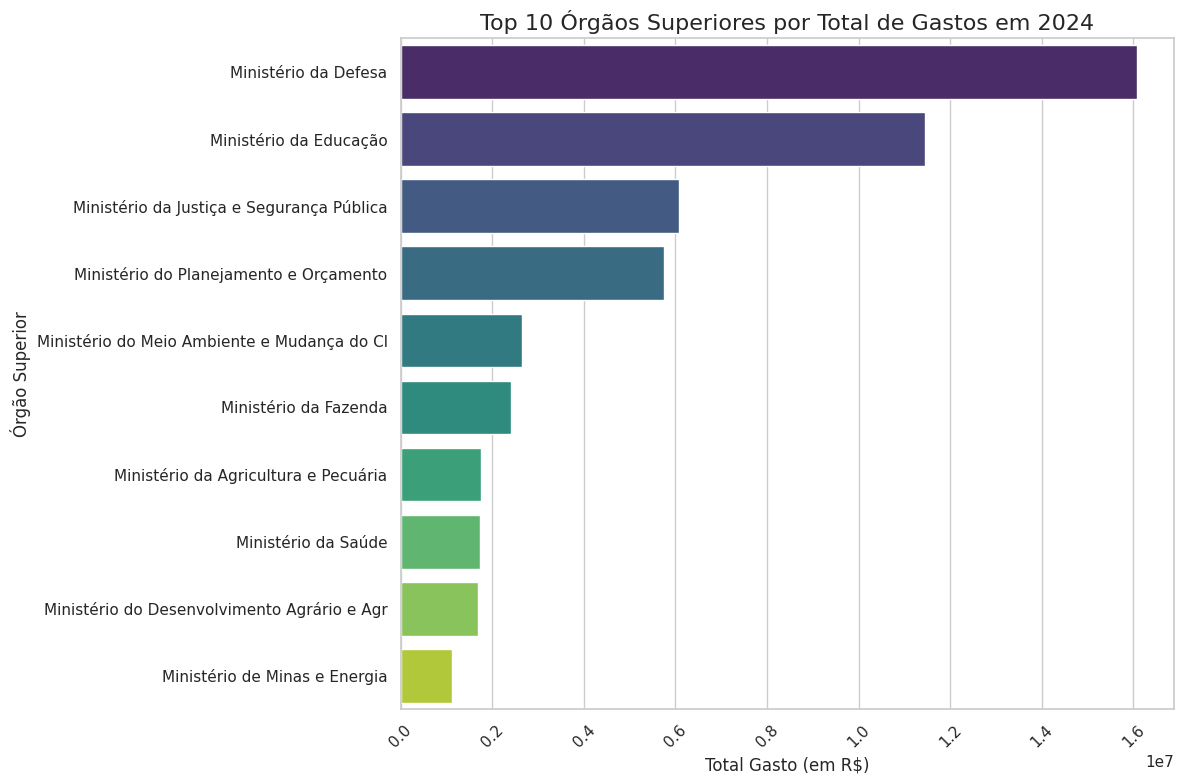

In [21]:
# Gastos por órgão, talvez?
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

gastos_por_orgao = df.groupby('NOME ÓRGÃO SUPERIOR')['VALOR TRANSAÇÃO'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=gastos_por_orgao.values, y=gastos_por_orgao.index, palette='viridis')
plt.title('Top 10 Órgãos Superiores por Total de Gastos em 2024', fontsize=16)
plt.xlabel('Total Gasto (em R$)', fontsize=12)
plt.ylabel('Órgão Superior', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Foram encontradas 10720 transações de SAQUE.

Análise Descritiva dos Valores de Saque:
count    10720.000000
mean       575.905142
std        440.775814
min          2.000000
25%        200.000000
50%        500.000000
75%       1000.000000
max       4979.480000
Name: VALOR TRANSAÇÃO, dtype: float64


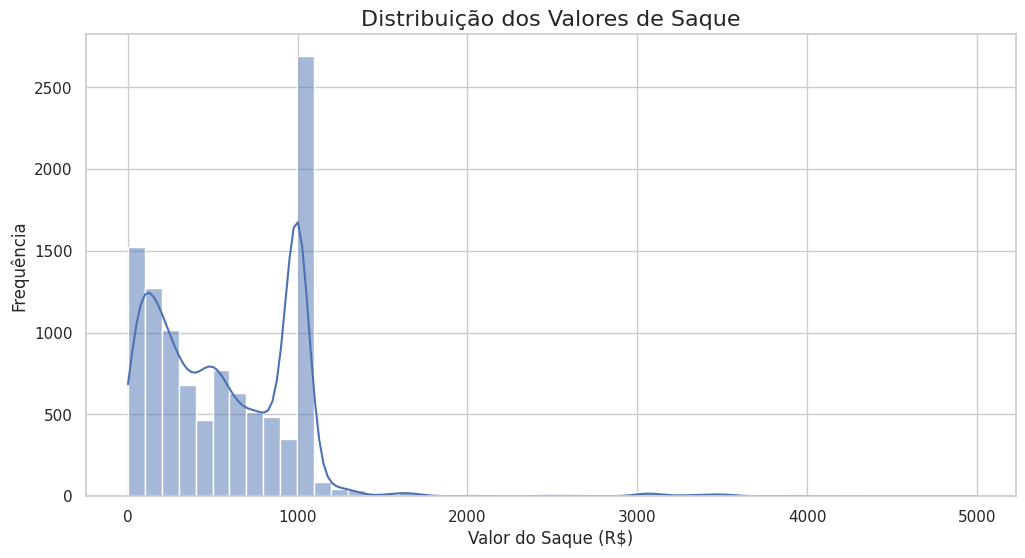

In [25]:
df_saques = df[df['TRANSAÇÃO'].str.contains('SAQUE', case=False, na=False)]

print(f"\nForam encontradas {len(df_saques)} transações de SAQUE.")

print("\nAnálise Descritiva dos Valores de Saque:")
print(df_saques['VALOR TRANSAÇÃO'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(df_saques['VALOR TRANSAÇÃO'], bins=50, kde=True)
plt.title('Distribuição dos Valores de Saque', fontsize=16)
plt.xlabel('Valor do Saque (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

In [26]:
# Ou podemos apenas ordenar os gastos

print("\n--- Top 10 Maiores Transações Individuais ---")

colunas_relevantes = [
    'DATA TRANSAÇÃO',
    'NOME ÓRGÃO SUPERIOR',
    'NOME FAVORECIDO',
    'TipoDeGasto',
    'VALOR TRANSAÇÃO'
]

# Ordenamos o DataFrame pelo valor e mostramos os maiores
top_10_gastos = df[colunas_relevantes].sort_values(by='VALOR TRANSAÇÃO', ascending=False).head(10)

# Exibindo o resultado formatado
print(top_10_gastos.to_string())


--- Top 10 Maiores Transações Individuais ---
       DATA TRANSAÇÃO                        NOME ÓRGÃO SUPERIOR                                    NOME FAVORECIDO TipoDeGasto  VALOR TRANSAÇÃO
30696      2024-10-03                       Ministério da Defesa                     MARAJO LOCACAO E SERVICOS LTDA      Outros        189650.00
30600      2024-10-04                       Ministério da Defesa               FRANCISCO E. SILVA CAPIISTRANIO LTDA      Outros        168000.00
36810      2024-10-17  Ministério da Justiça e Segurança Pública                                     SEM INFORMACAO      Outros        122038.19
52244      2024-09-17  Ministério da Justiça e Segurança Pública                                     SEM INFORMACAO      Outros        103864.77
37504      2024-10-24  Ministério da Justiça e Segurança Pública                                     SEM INFORMACAO      Outros         52812.38
30697      2024-10-08                       Ministério da Defesa                   